In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from ema_workbench import (perform_experiments, ema_logging, save_results, 
                           load_results, MultiprocessingEvaluator)
from ema_workbench.em_framework import samplers, util

import ema_workbench.analysis.pairs_plotting as pairs
import ema_workbench.analysis.plotting as emaplt

# turn on logging
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Initial Exploration 
This contains some basic exploratory visualization of the initial SIR-SEIR model as provided in the assignment. It serves to provide a foundation for further scenario analysis and discovery. 

First is basic visualization of a large data set using Latin Hypercube Sampling. The first chart, below, tracks the values of each of the stocks in the model, along with the SIR, SEIR switch (which we use in later analysis) and maps values with density to give an idea of the value ranges of each of the stocks in the complete uncertainty space. 

In [ ]:
results = load_results('./data/category_LHS_1200.tar.gz')
experiments, outcomes = results

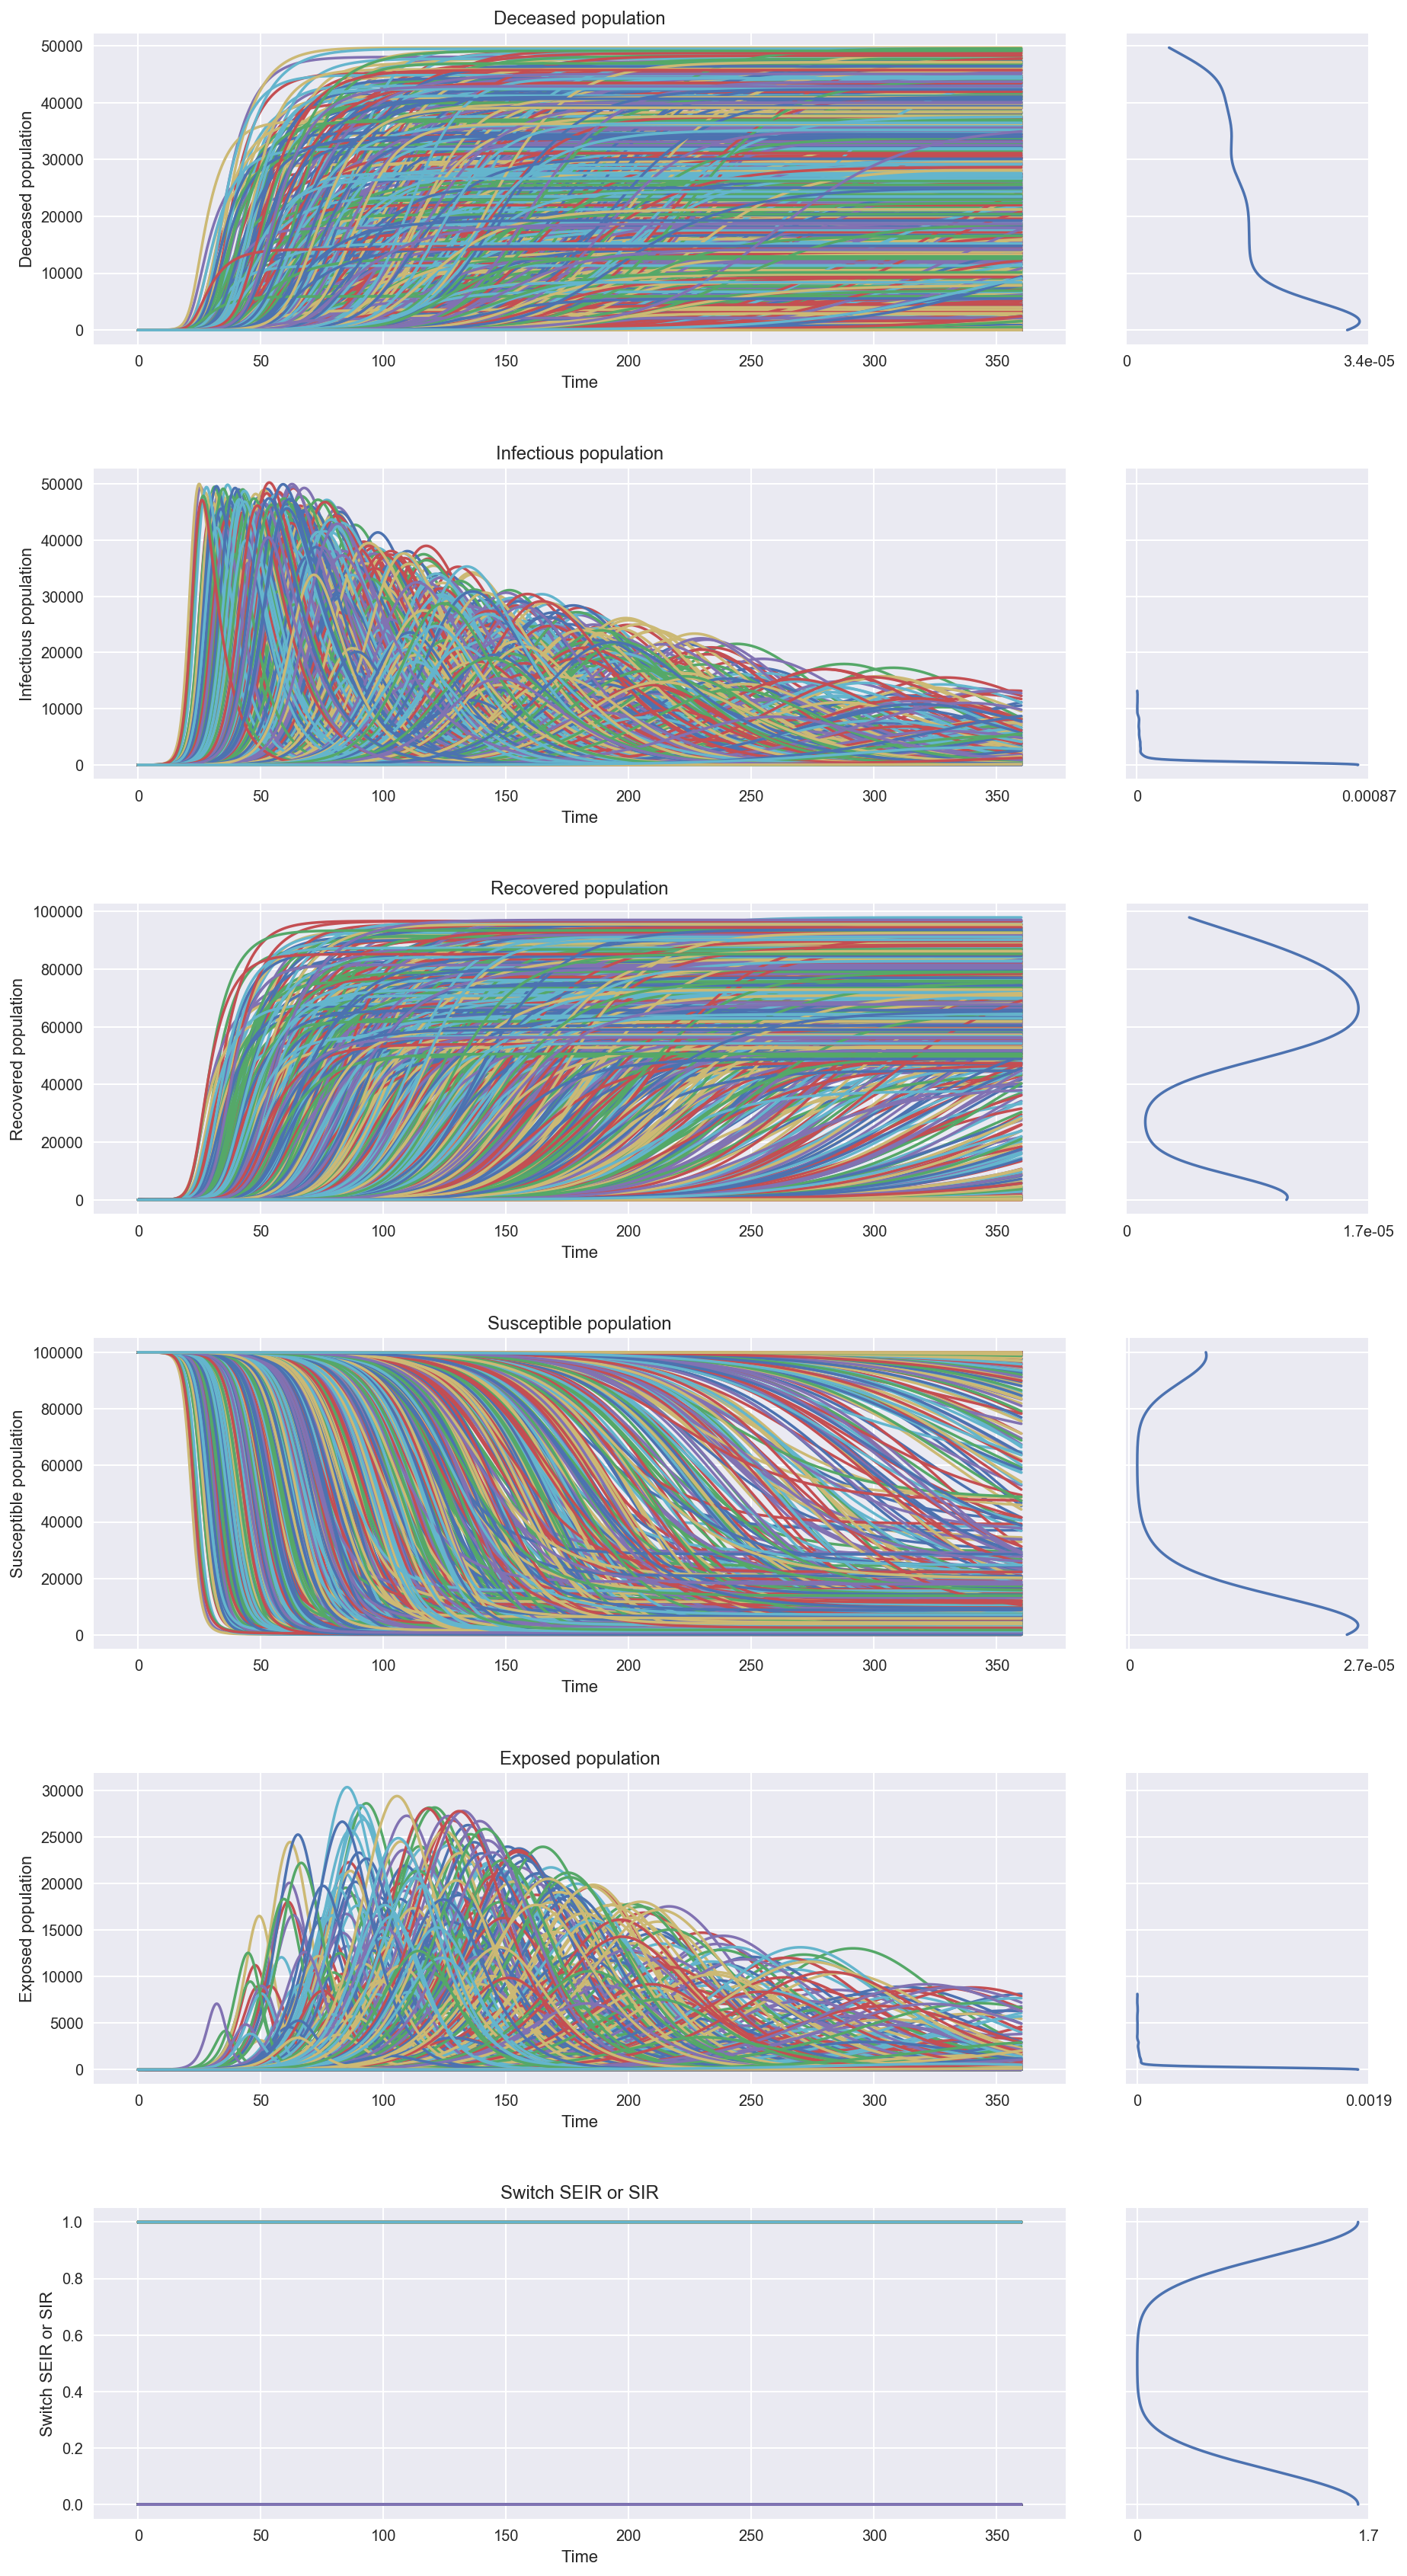

In [7]:
figure = emaplt.lines(results,density=u'kde') #show lines, and end state density
plt.rcParams["figure.figsize"] = (15,30)
plt.show() #show figure

The second method is examining the relationship between the targeted outcomes, grouped by whether the disease model should be SIR or SEIR. These results can demonstrate how similar the relationships are when the disease model changes. 

The only significant difference in relationships comes when you compare an ouput with the Exposed population, which makes sense because that is the major difference in the model between the two cases. However, overall relationships of the other output variables seem consistent over both cases. 

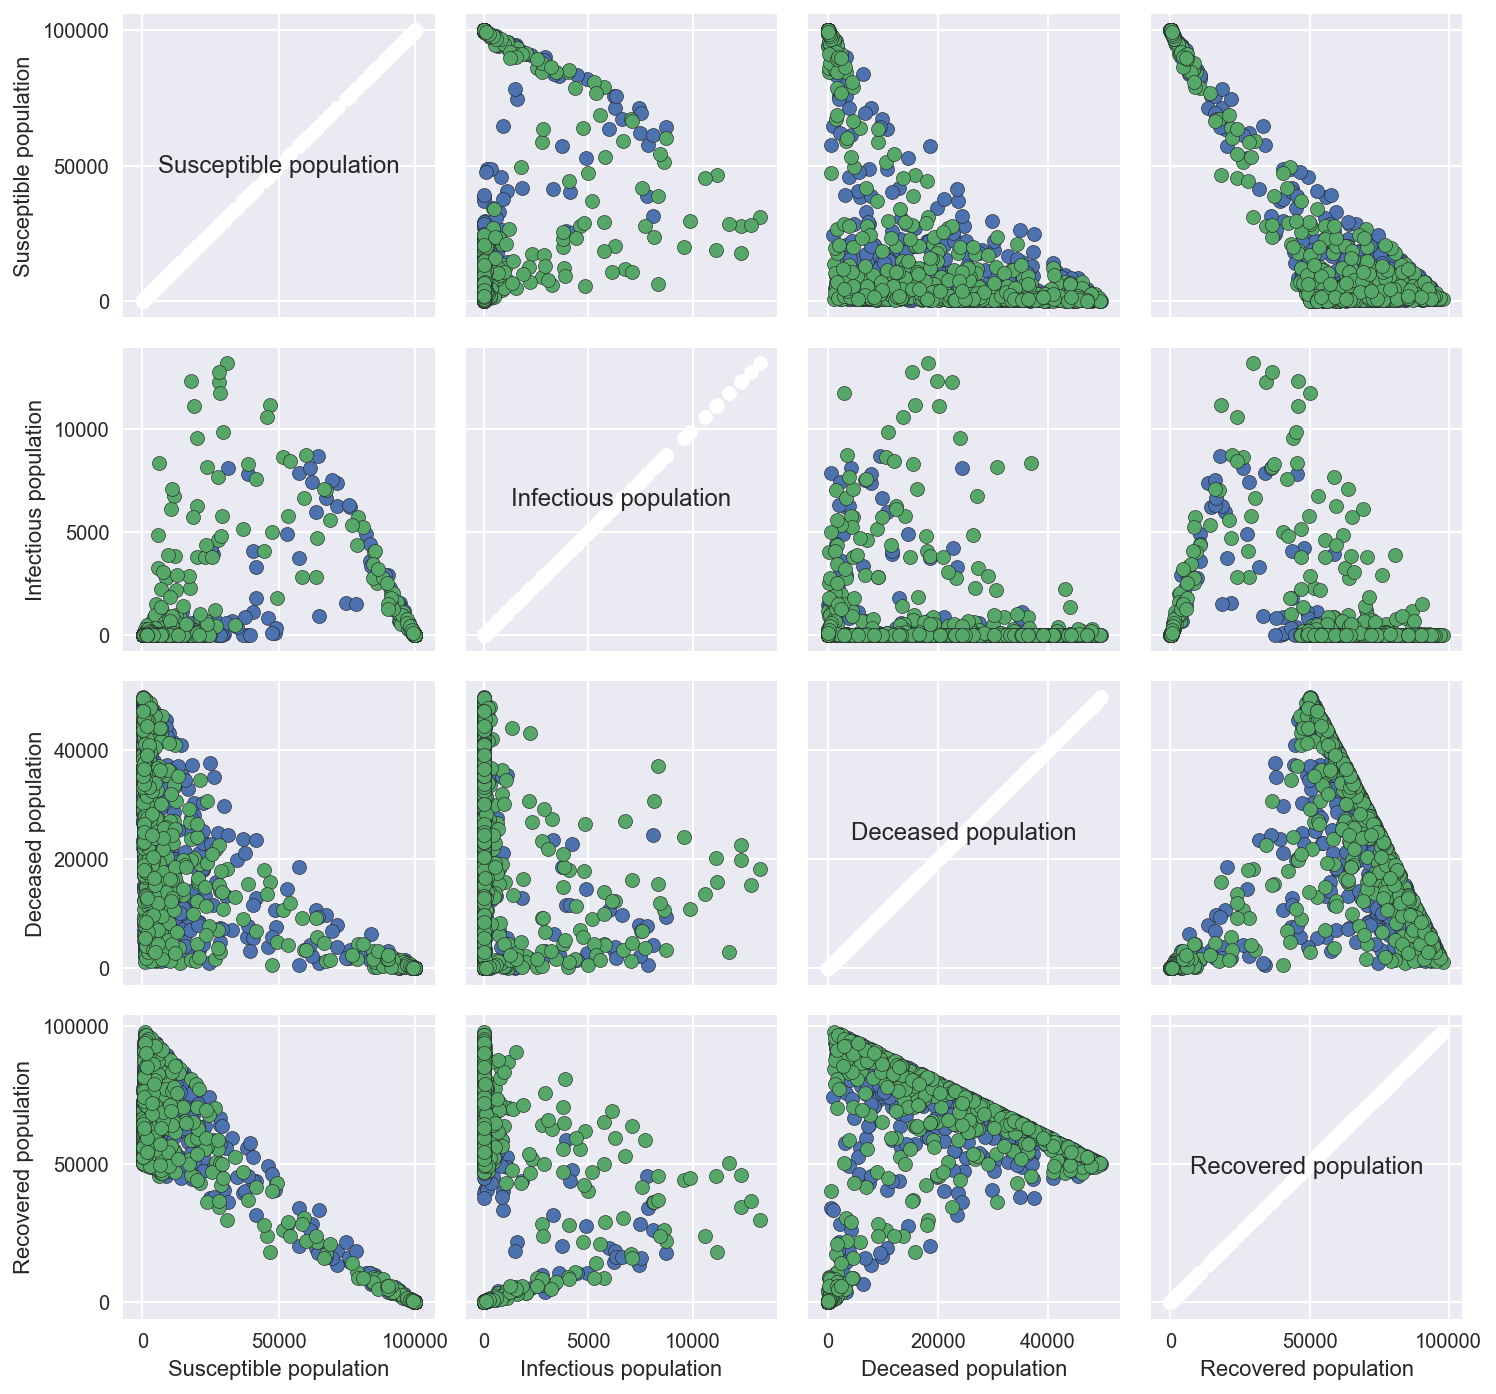

In [5]:
outcomes = ['Susceptible population',  
            'Infectious population', 'Deceased population', 
            'Recovered population']

fig, axes = pairs.pairs_scatter(results, 
                                outcomes_to_show=outcomes,
                                group_by='Switch SEIR or SIR', 
                                legend=False)

fig.set_figheight(12)
fig.set_figwidth(12)

for ax in axes.values():
    ax.locator_params(nbins=4)

plt.show()

## Comparing SIR and SEIR results
To get a better look at potential differences between SIR and SEIR, the graphs below plot isolated data for each case, first SIR and then SEIR.

Though there are slight differences, the overall sahpe of the graphs and densities are consistent between the two versions. There is a slight time dealy in the SEIR model, but the output reaches a similar level by the end of the model run. So, infectious disease will have similar impacts on the population using either an SEIR or SIR model-based.

In [ ]:
sir = load_results('./data/SIR_600_LHS.tar.gz')
seir = load_results('./data/SEIR_600_LHS.tar.gz')

[MainProcess/WARNING] singular matrix


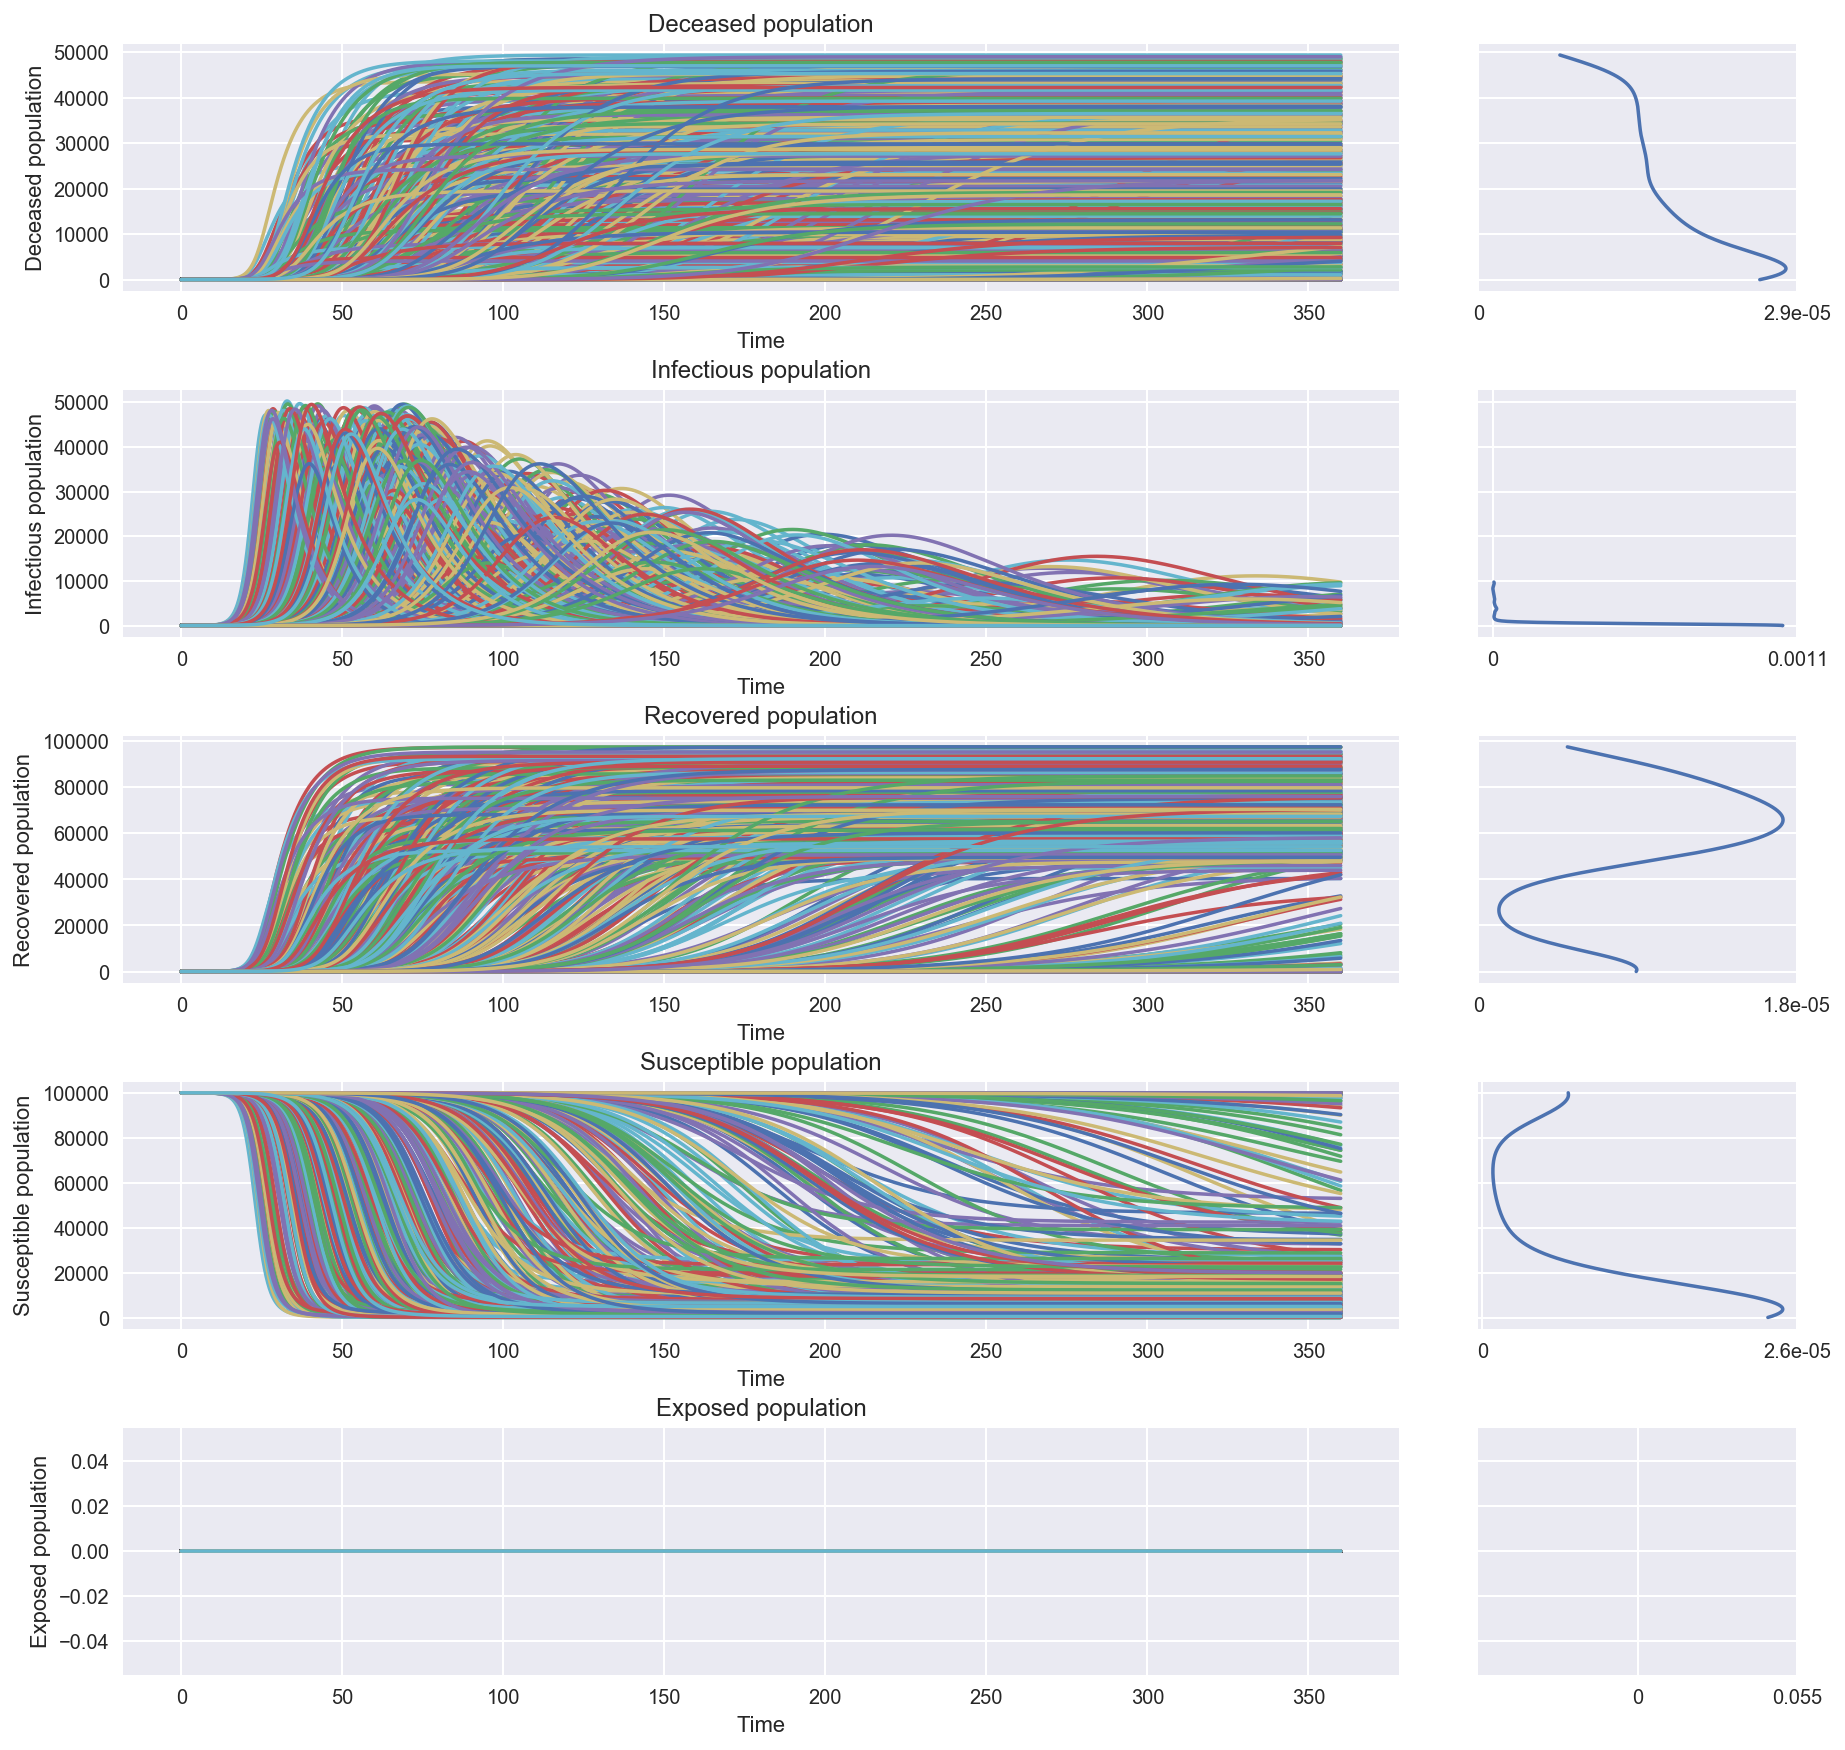

In [17]:
figure = emaplt.lines(sir,density=u'kde') #show lines, and end state density
plt.rcParams["figure.figsize"] = (15,15)
plt.show() #show figure

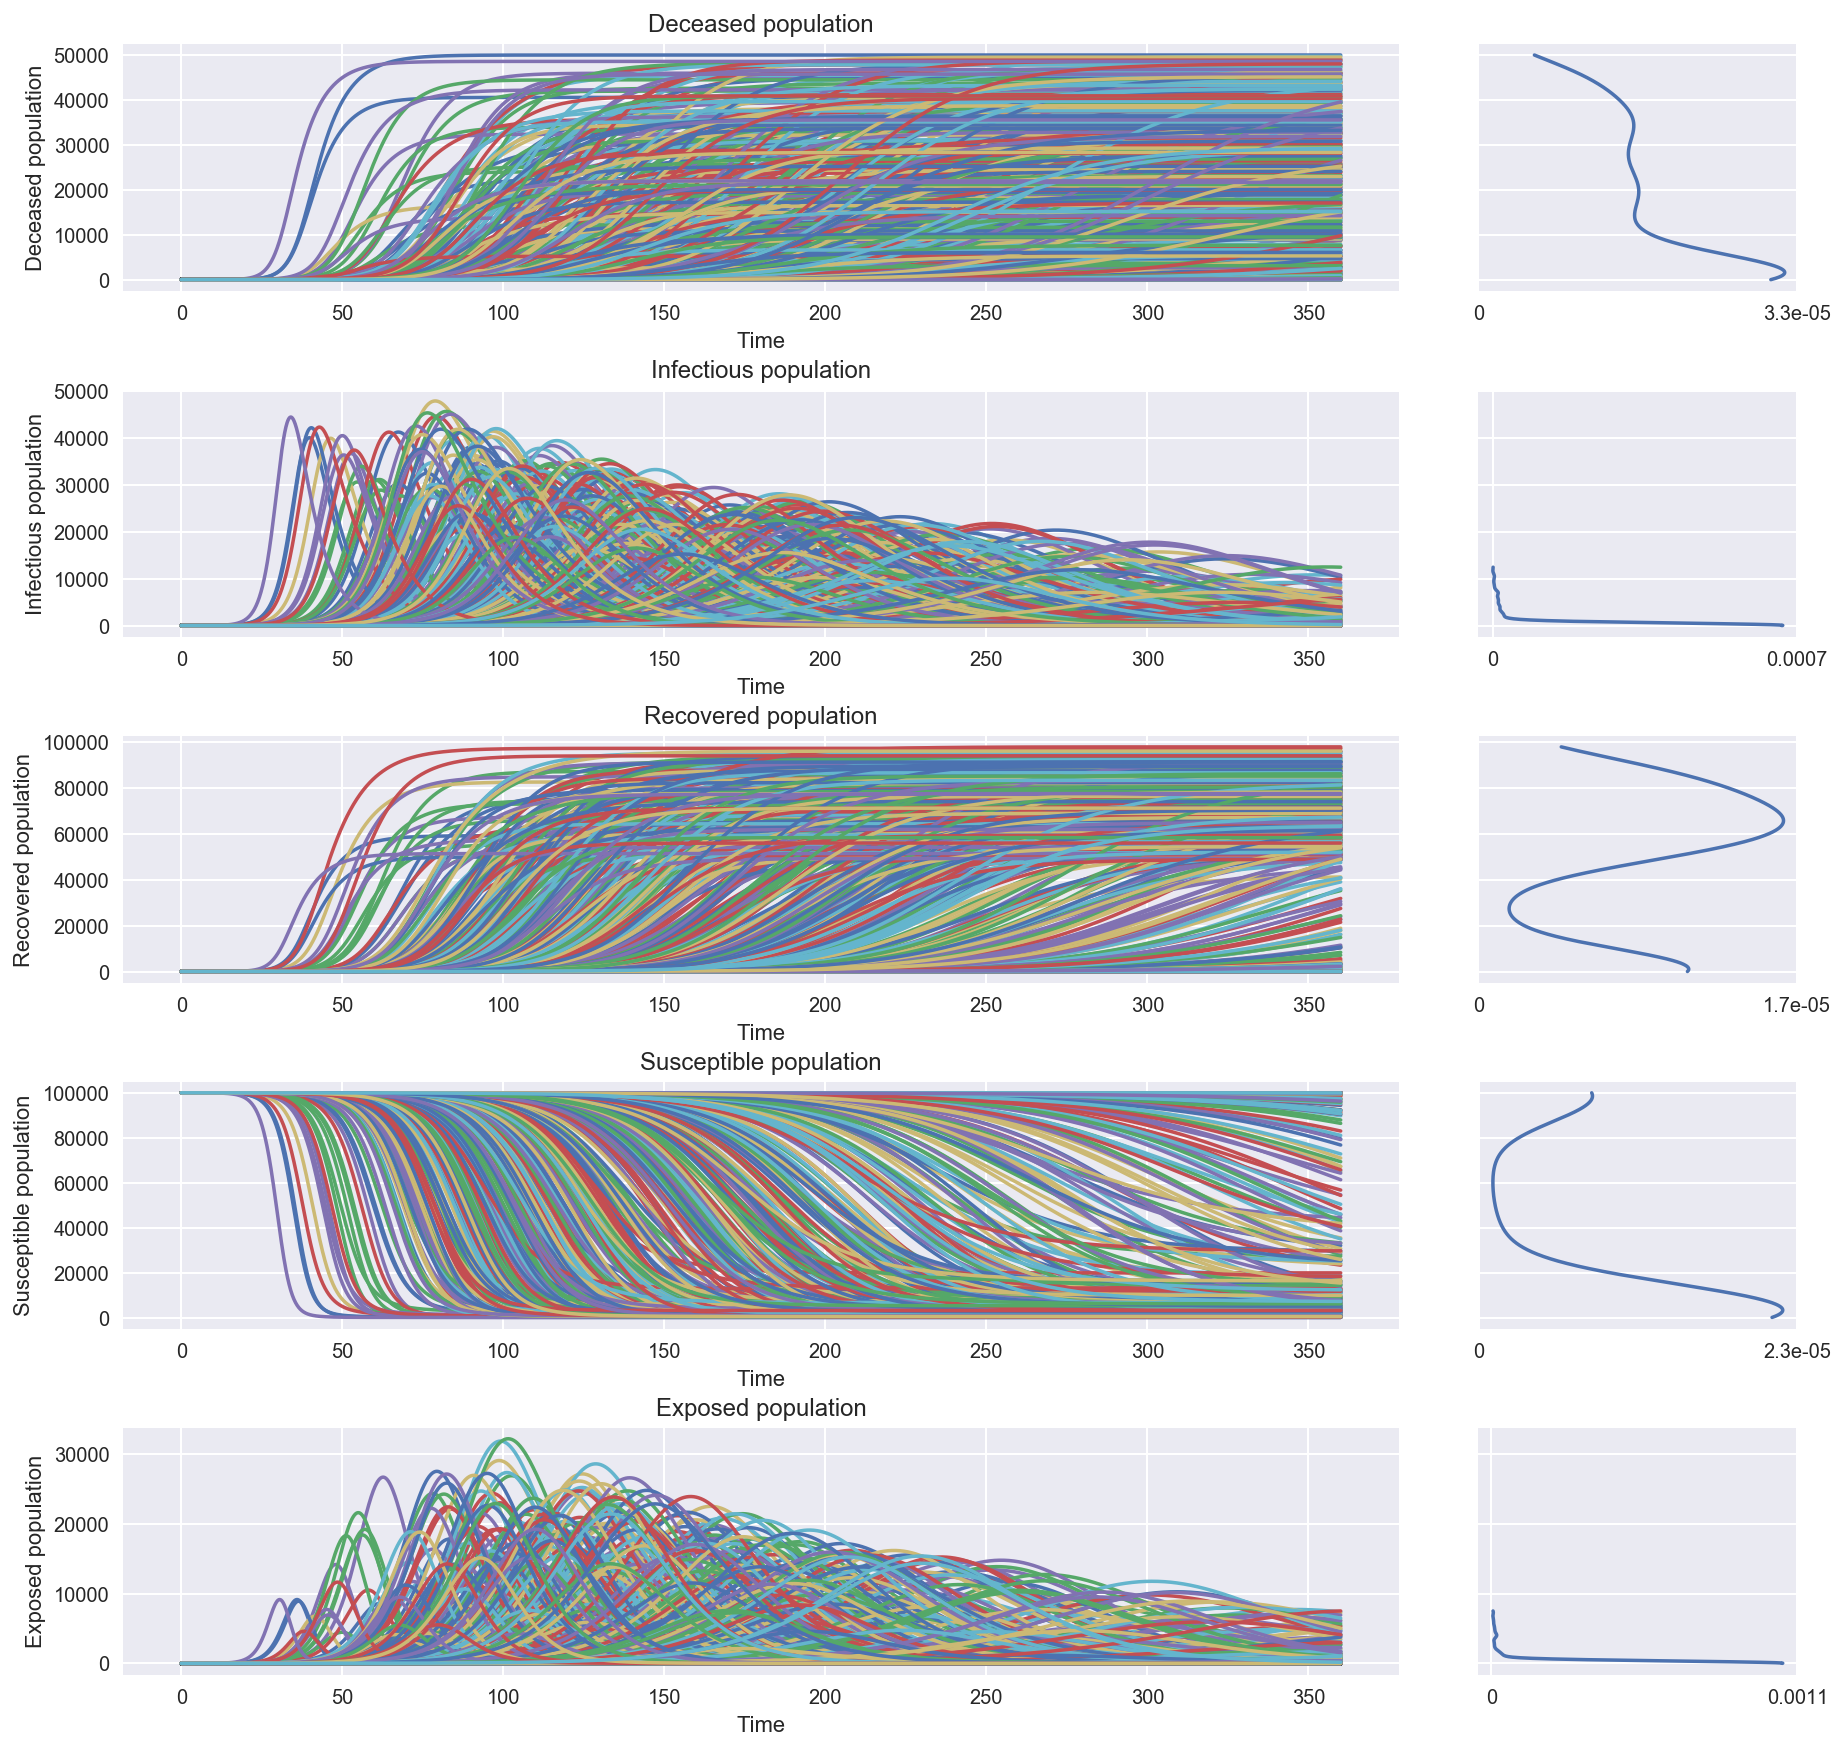

In [16]:
figure = emaplt.lines(seir,density=u'kde') #show lines, and end state density
plt.rcParams["figure.figsize"] = (15,15)
plt.show() #show figure

## Comparing Sampling Techniques
Finally, as a comparative check for our sampling technique, we compare the results of outputs from multiple sampling techniques using some basic visualization. Here, we are looking for dramatic differences in trends and relationships. 

We built basic data sets using several sampling techniques, including Latin Hypercube, Monte Carlo, and Partial Factorial. To compare sampling techniques, we will visualize the uncertainty ranges of two of the inputs over time: average infectious period and case fatality rate. 

These graphs demonstrate that LHS AND PFF give us the most even distribution. We will be using LHS for additional analysis moving forward. 

In [ ]:
lhs = load_results('./data/category_LHS_1200.tar.gz')
mc = load_results('./data/category_MC_1200.tar.gz')
pff = load_results('./data/category_PFF_1200.tar.gz')

plt.rcParams["figure.figsize"] = (7,7)

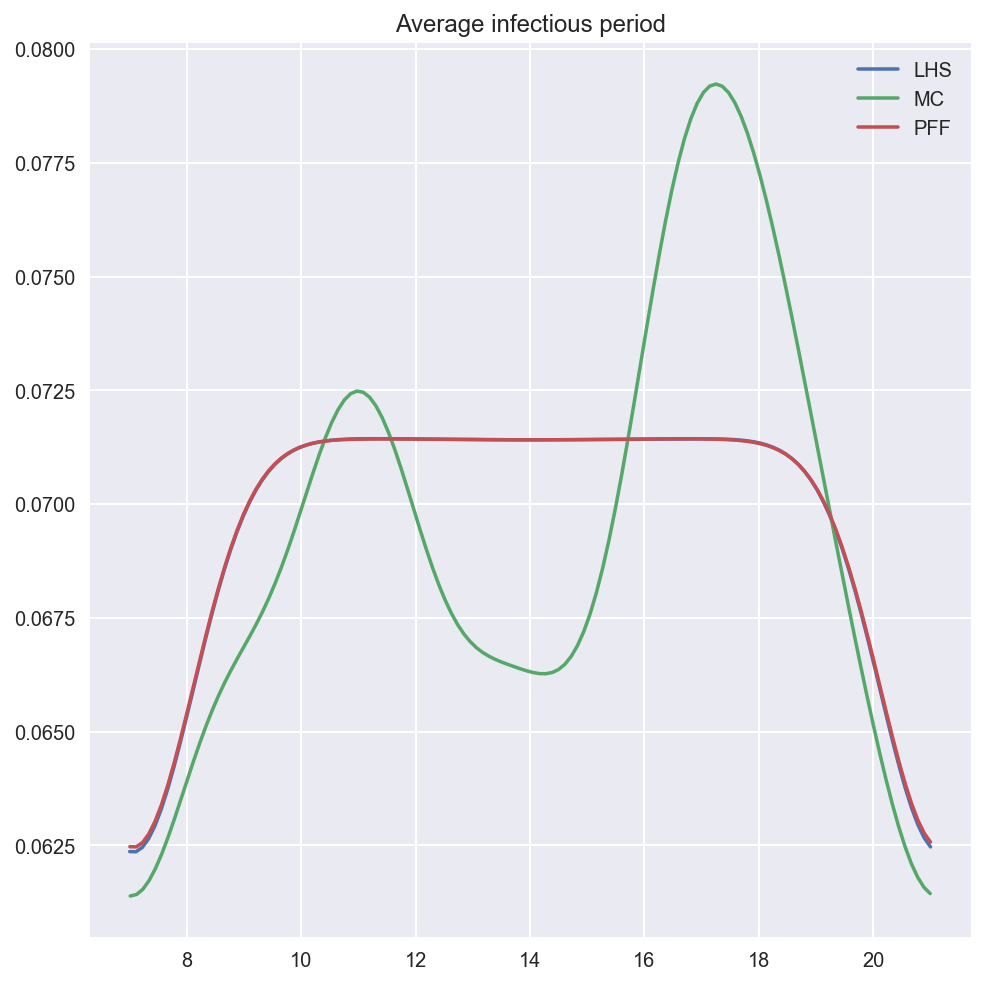

In [12]:
ax = plt.axes

sns.kdeplot(lhs[0]['Average infectious period'], cut=0, label='LHS')
sns.kdeplot(mc[0]['Average infectious period'], cut=0, label = 'MC')
sns.kdeplot(pff[0]['Average infectious period'], cut=0, label = 'PFF')
sns.plt.title('Average infectious period')

plt.legend()
plt.show()

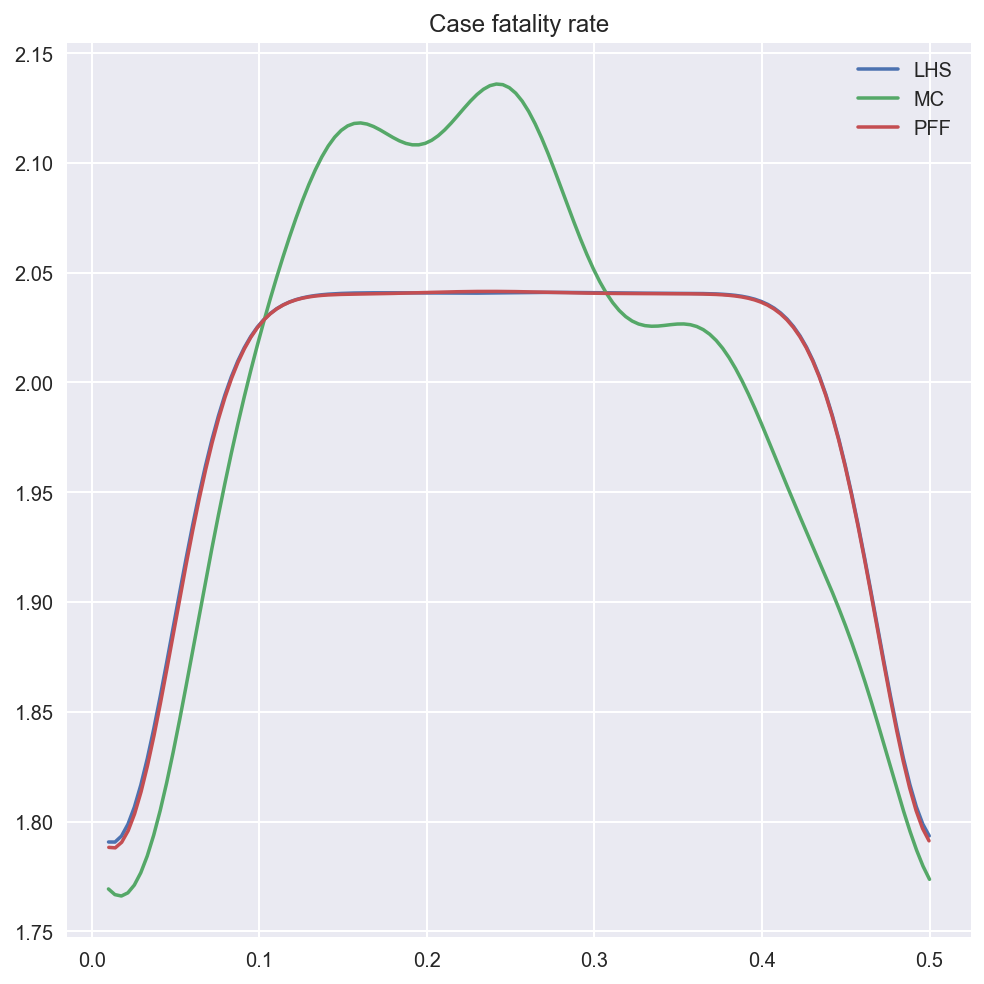

In [13]:
ax = plt.axes

sns.kdeplot(lhs[0]['Case fatality rate'], cut=0, label='LHS')
sns.kdeplot(mc[0]['Case fatality rate'], cut=0, label = 'MC')
sns.kdeplot(pff[0]['Case fatality rate'], cut=0, label = 'PFF')
sns.plt.title('Case fatality rate')

plt.legend()
plt.show()